In [ ]:
from config import classes

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image as im

if os.environ['CONDA_PREFIX'] == '/home/david/.miniforge3/envs/tf-gpu':
    import tensorrt

import tensorflow as tf
load_img   = tf.keras.preprocessing.image.load_img
load_model = tf.keras.models.load_model 

In [ ]:
data_dir = '../pics/'
img_height = 224
img_width  = 224

dataset = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width),
  seed=42
)

X, y = [], []

for image, label in dataset:
    X.append(image)
    y.append(label)

X = np.concatenate(X)
y = np.concatenate(y)

In [3]:
%%script echo skip

data_dir = '../pics/'
img_height = 224
img_width  = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
)

test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
)


skip


In [4]:
%%script echo skip

Xtrain, ytrain, Xtest, ytest = [],[],[],[]

for image, label in train_ds:
    Xtrain.append(image)
    ytrain.append(label)

for image, label in test_ds:
    Xtest.append(image)
    ytest.append(label)

Xtrain = np.concatenate(Xtrain)
Xtest  = np.concatenate(Xtest)
ytrain = np.concatenate(ytrain)
ytest  = np.concatenate(ytest)

skip


In [5]:
#Xtrain.shape, Xtest.shape

In [6]:
#ytrain.shape, ytest.shape

In [7]:
%%script echo skip

X = []
y = []
base_path = '../pics'


for i, target in enumerate(classes):
      
      files = os.listdir(base_path+'/'+target)
      for file in files:

         img = load_img(base_path+'/'+target+'/'+file)
         img_array = np.asarray(img)
         X.append(img_array)
         y.append(i)


X = np.array(X)
y = np.array(y)

shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

skip


In [8]:
X.shape, y.shape

((732, 224, 224, 3), (732,))

In [9]:
tf.keras.backend.clear_session()


ll_neurons = len(classes)
filters    = 16
ksize      = 3
av         = 'relu'


model = tf.keras.Sequential([
  
  tf.keras.layers.Rescaling(1/255, input_shape=X.shape[1:]),
  
  tf.keras.layers.Conv2D(filters, ksize, activation=av),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Conv2D(filters*2, ksize, activation=av),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Conv2D(filters*4, ksize, activation=av),
  tf.keras.layers.MaxPooling2D(),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(units=filters*8, activation=av),
  
  tf.keras.layers.Dense(ll_neurons, activation='softmax')
])


In [10]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.categorical_crossentropy,
  metrics=['accuracy']
)

In [ ]:
history = model.fit(
  X,
  tf.keras.utils.to_categorical(y),
  epochs=4,
  batch_size=4,
  validation_split=0.2
)

In [7]:
%%script echo skipped model saving!

model.save("model.h5")
print("Model saved!")

skipped model saving!


Text(0.5, 0, 'epochs')

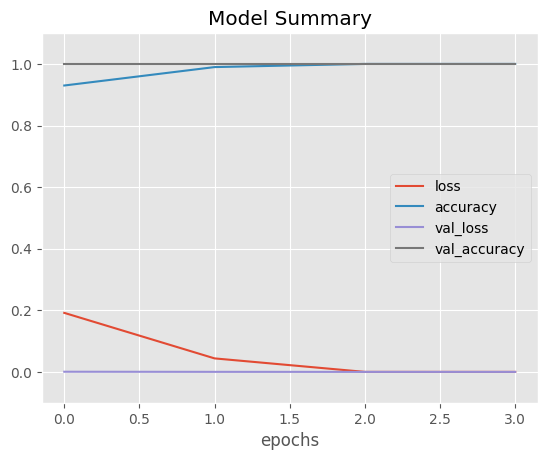

In [12]:
plt.style.use('ggplot')
pd.DataFrame(history.history).plot()
plt.ylim([-0.1,1.1])
plt.title("Model Summary")
plt.xlabel("epochs")

In [2]:
model = load_model("model.h5")

In [13]:
preds = model.predict(X)

23/23 [==============================] - 1s 14ms/step


In [ ]:
n = np.random.randint(0,len(X))
print(f"Prediction: {classes[np.argmax(preds[n])]}")
print(f"True:       {classes[y[n]]}")
#im.fromarray(X[n])
tf.keras.utils.array_to_img(X[n])